<a href="https://colab.research.google.com/github/RLR-GitHub/MultilayerPerceptron/blob/master/OLD_MLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import random, seed, uniform

# VARIABLES

In [0]:
count = 0 
step = 0

# N = 2 AND J = 50 AND M = 900 IS GREAT RESULTS
# N = 2 AND J = 30 AND M = 900 IS EVEN BETTER RESULTS
# N = 2 AND J = 30 AND M = 2500 AND E =100 IS EVEN BETTER RESULTS

N = 2           # Number of inputs -- x point, y point
J = 10           # Number of hidden neurons
K = 1           # Number of output neurons 
M = 1600         # 10 x 10 -- Number of training patterns (input/output pairs) - Number of red and blue dots within image that is visable to network -- needs to be less than size of image
MTEST = 1600     # 20 x 20 -- Number of test set inputs
EPOCHS = 2000    # Complete training set pass-throughs
LEARNING_RATE = 0.1        # learning rate (rho )

# Setup Matrices

In [0]:
#==================================================================
# TRAINING
X_train = np.zeros( shape = ( M, N ) )    # 100 x 2 -- shape = ( r, c ) Training set inputs 
Y_train = np.zeros( shape = ( M, K ) )    # 100 x 1 -- shape = ( r, c ) Training set output vector 
D_train = np.zeros( shape = ( M, K ) )    # 100 x 1 -- shape = ( r, c ) Training set target vector

# TESTING
X_test = np.zeros( shape = ( MTEST, N ) ) # 400 x 2 -- shape = ( r, c ) Test set inputs 
Y_test = np.zeros( shape = ( MTEST, K ) ) # 400 x 1 -- shape = ( r, c ) Test set output vector 
D_test = np.zeros( shape = ( MTEST, K ) ) # 400 x 1 -- shape = ( r, c ) Test set target vector
#==================================================================
x = np.zeros( shape = ( N ) ) # 2 -- A single input vector from training set 
y = np.zeros( shape = ( K ) ) # 1 -- Single vector of outupt neurons 
d = np.zeros( shape = ( K ) ) # 1 -- A single target vector from training set 
z = np.zeros( shape = ( J ) ) # 8 -- Vector of hidden layer neurons 
#==================================================================
# WEIGHTS
delta = np.zeros( shape = ( K ) ) 

V = np.zeros( shape = ( J, N ) ) # 8 x 2 -- Weight matrix for hidden layer 1
W = np.zeros( shape = ( K, J ) ) # 1 x 8 -- Weight matrix for hidden layer 2

delta_V = np.zeros( shape = ( J, N ) ) # 8 x 2 -- Weight changes for hidden layer 1
delta_W = np.zeros( shape = ( K, J ) ) # 1 x 8 -- Weight changes for hidden layer 2

net_hidden = np.zeros( shape = ( J ) ) # 8 -- Weighted sum of hidden layer ( Z )
net_output = np.zeros( shape = ( K ) ) # 1 -- Weiughted sum of output layer ( Y )
#==================================================================

# FUNCTIONS

In [0]:
def setupRandomMatrix( matrix, min_val, max_val ):
    r, c = matrix.shape
    #rand_arr1 = np.random.random( size = ( r + 1, c + 1 ) )
    rand_arr1 = np.random.uniform( low = min_val, high = max_val, size = ( r + 1, c + 1 ) )

    for i in range( r ):
        for j in range( c ): 

            #matrix[ i ][ j ] = 2 * max_val * rand_arr1[ r ][ c ] + min_val # Generates random number [0, 1)
            matrix[ i ][ j ] = rand_arr1[ i ][ j ] # Generates random number [0, 1)

    return( matrix )

# Dot Product -- Multiply each of the features with a weight and compute the sum
def matrixVectorProduct( matrix, vector ):
    r, c = matrix.shape

    sum_vector = np.zeros( shape = ( r ) )
    for i in range( r ):
        summation = 0.0
        for j in range( c ): 
            summation = summation + vector[ j ] * matrix[ i ][ j ] 
        
        sum_vector[ i ] = summation
    return( sum_vector )

def sigmoid_vector( net ):
    n = net.size
    sig_vec = np.zeros( shape = ( n ) )

    for i in range( n ):
        sig_vec[ i ] = 1.0 / ( 1 + math.exp( -1 * net[ i ] ) )
    
    return( sig_vec )


def weightChanges_W( delta, z, lr = LEARNING_RATE ):
    delta_W = np.zeros( shape = ( K, J ) )

    for j in range( J ): 
        delta_W[ 0 ][ j ] = lr * delta * z[ j ]

    return( delta_W )

def weightChanges_V( W, delta, z, x, lr = LEARNING_RATE ):
    delta_V = np.zeros( shape = ( J, N ) )

    for j in range( J ):
        summation = delta * W[ 0 ][ j ]
        for i in range( N ):
            delta_V[ j ][ i ] = lr * z[ j ] * ( 1 - z[ j ] ) * x[ i ] * summation
    return( delta_V )

def updateWeights( delta_W, W ):
    r, c = delta_W.shape
    
    for j in range( c ): 
        W[ 0 ][ j ] = delta_W[ 0 ][ j ] + W[ 0 ][ j ]

    return( W )
    
def getTrainingSetInputs( inputs ): ### MAY BE WRONG
    r, c = inputs.shape
    print( r, c )
    #seed(1) # Seed random number generator 
    #rand_arr2 = np.random.random( size = ( r + 1, c+1 ) )
    rand_arr2 = np.random.uniform( low = -1.0, high = 1.0, size = ( r + 1, c + 1 ) )

    for i in range( r ):
        #inputs[ i ][ 0 ] = (2 * rand_arr2[ r ][ 0 ]) - 1.0 #2 * random() - 1# Generates random number [0, 1)
        #inputs[ i ][ 1 ] = (2 * rand_arr2[ r ][ 1 ]) - 1.0 #uniform( -1.0 , 1.0 )#2 * random() - 1# Generates random number [0, 1)
        inputs[ i ][ 0 ] = rand_arr2[ i ][ 0 ]
        inputs[ i ][ 1 ] = rand_arr2[ i ][ 1 ]

    return( inputs )

def getTrainingTargetOutputs( targets, inputs, area ):
    size = inputs.size 
    #side_length = int( math.sqrt( size ) )

    summation = 0.0
    #area = 2.0
    radius = math.sqrt( area / math.pi )
    r, c = targets.shape
    #targets = np.zeros( shape = ( r, c ) )

    for i in range( r ):
        sqrt_sum = math.sqrt( ( inputs[ i ][ 0 ] * inputs[ i ][ 0 ] ) + ( inputs[ i ][ 1 ] * inputs[ i ][ 1 ] ) )
        if( sqrt_sum <= radius ): targets[ i ][ 0 ] = True
        else: targets[ i ][ 0 ] = False
    return( targets )


def getTestingSetInputs( inputs ):
    r, c = inputs.shape
    size = inputs.size
    numSides = math.sqrt( r )
    step = 2 / ( numSides - 1 )
    inc = 0.0
    for i in range( r ):
        if( i % numSides == 0 and i != 0 ): inc = inc + 1
        inputs[ i ][ 1 ] = 1.0 - step * inc               # values from 1 to -1
        inputs[ i ][ 0 ] = -1.0 + step * ( i % numSides ) # values from -1 to 1

    return( inputs )

def getTestingTargetOutputs( targets, inputs, area ):
    #size = inputs.size 
    #side_length = int( math.sqrt( size ) )

    summation = 0.0
    #area = 2.0
    radius = math.sqrt( area / math.pi )
    r, c = targets.shape
    targets = np.zeros( shape = ( r, c ) )

    for i in range( r ):
        for j in range( c ): 
            summation = math.sqrt( ( inputs[ i ][ 0 ] * inputs[ i ][ 0 ] ) + ( inputs[ i ][ 1 ] * inputs[ i ][ 1 ] ) )
            if( summation <= radius ): targets[ i ][ j ] = True
            else: targets[ i ][ j ] = False

    return( targets )

def printSquarePLT( matrix, string, cmap = plt.cm.Blues ):

    size = matrix.size 
    side_length = int( math.sqrt( size ) )
    new_mat = np.reshape( matrix, newshape = (side_length, side_length ) )

    fig, ax = plt.subplots( figsize = ( 5,5 ) )
    ax.matshow( new_mat, cmap = cmap ) #Blues
    #ax.set_ylim( -1, side_length )
    #ax.set_xlim( -1, side_length )
    ax.set_ylim( [-1,1] )
    ax.set_xlim( [-1,1] )
    ax.set_title( string, va = 'bottom' )

    for r in range( side_length ):
        for c in range( side_length ):
            val = int( round( new_mat[ r ][ c ] ) )
            ax.text( r, c, str( val ), va = 'center', ha = 'center' )

def printSquarePLT2( matrix,mat2, string, cmap = plt.cm.Blues ):

    size = matrix.size 
    side_length = int( math.sqrt( size ) )
    #new_mat = np.reshape( matrix, newshape = (side_length, side_length ) )

    fig, ax = plt.subplots( figsize = ( 5,5 ) )
    #ax.matshow( (side_length,side_length), cmap = cmap ) #Blues
    #ax.set_ylim( -1, side_length )
    #ax.set_xlim( -1, side_length )
    ax.set_ylim( [-1,1] )
    ax.set_xlim( [-1,1] )
    ax.set_title( string, va = 'bottom' )
   # plt.scatter( )
    for r in range( size ):
        #for c in range( side_length ):
        val = int( round( matrix[ r ][ 0 ] ) )
        ax.text( mat2[ r ][0], mat2[r][1], str( val ), va = 'center', ha = 'center' )

def printSquarePLT_NEW( D, X, string, cmap = plt.cm.Blues ):

    size = D.size 
    side_length = int( math.sqrt( size ) )
    new_mat = np.reshape( D, newshape = (side_length, side_length ) )

    fig, ax = plt.subplots( figsize = ( 10,10 ) )
    ax.matshow( new_mat, cmap = cmap ) #Blues
    ax.set_ylim( [-1,1] )
    ax.set_xlim( [-1,1] )
    ax.set_title( string, va = 'bottom' )

    for r in range( side_length ):
       # for c in range( side_length ):

            val = int( round( D[ r ][ 0 ] ) )

            ax.text( X[ r ][ 0 ], X[ r ][ 1 ], str( val ), va = 'center', ha = 'center' )

# TRAINING PHASE

In [0]:
# GET TRAINING PATTERN VALUES 
X_train = getTrainingSetInputs( X_train ) # random points in [-1,1]x[-1,1]
D_train = getTrainingTargetOutputs( D_train, X_train, area = 2.0 )
#X_test = getTestingSetInputs( X_test )
#D_train = getTestingTargetOutputs( D_train, X_test, area = 2.0 )

# INITIALIZE WEIGHT MATRICIES 
V = setupRandomMatrix( V, -15.0, 15.0)
W = setupRandomMatrix( W, -15.0, 15.0)

count = 0
E = 0.0 
new_lr = LEARNING_RATE
old_best_err_val = 10000000

for epoch in range( EPOCHS ):

    E = 0.0 
    for m in range( M ): 

        # FORWARD PASS
        
        x = X_train[ m ][:]                       # Get mth row of X
        d = D_train[ m ][:]                       # Get mth row of D 

        net_hidden = matrixVectorProduct( V, x )       # Get weighted sums of hidden layer 
        z = sigmoid_vector( net_hidden )               # Get weighted outputs of hidden layer 

        net_output = matrixVectorProduct( W, z )       # Get weighted sums of output layer 
        y = ( 1.0 / ( 1.0 + math.exp( -1.0 * net_output[0] ) ))          # Get weighted outputs of output layer 

        Y_train[ m ] = y

        # BACKWARD PASS

        delta = ( d[ 0 ] - y ) * y * ( 1 - y )                        

        delta_W = weightChanges_W( delta, z, new_lr )          # Compute weight changes of W 
        #delta_V = weightChanges_V( W, delta, z, x, new_lr )    # Compute weight changes of V

        W = updateWeights( delta_W, W )                # Compute weight update of W 
        
        delta_V = weightChanges_V( W, delta, z, x, new_lr )    # Compute weight changes of V
        V = updateWeights( delta_V, V )                # Compute weight update of V
        
        E = E + 0.5 * (d[0]-y)*(d[0]-y)
    if( (epoch % 200 == 0) and (epoch > 10) ): new_lr = new_lr * 0.9
    elif( int( E ) <= int( old_best_err_val ) ): 
        old_best_err_val = E 
        count = 0
    else: 
        count = count + 1
        if( count >= 50 ): 
            new_lr = new_lr * 0.80
            #print( "LEARNING RATE CHANGE")
            count = 0

    print("Epoch: {0:4d}".format( epoch ), "Error: {0:5f}".format( E ), "LR:", new_lr)

1600 2
Epoch:    0 Error: 355.762089 LR: 0.1
Epoch:    1 Error: 355.210245 LR: 0.1
Epoch:    2 Error: 354.721384 LR: 0.1
Epoch:    3 Error: 354.268505 LR: 0.1
Epoch:    4 Error: 353.831328 LR: 0.1
Epoch:    5 Error: 353.396690 LR: 0.1
Epoch:    6 Error: 352.956404 LR: 0.1
Epoch:    7 Error: 352.504854 LR: 0.1
Epoch:    8 Error: 352.037314 LR: 0.1
Epoch:    9 Error: 351.549027 LR: 0.1
Epoch:   10 Error: 351.034804 LR: 0.1
Epoch:   11 Error: 350.488940 LR: 0.1
Epoch:   12 Error: 349.905363 LR: 0.1
Epoch:   13 Error: 349.277929 LR: 0.1
Epoch:   14 Error: 348.600768 LR: 0.1
Epoch:   15 Error: 347.868554 LR: 0.1
Epoch:   16 Error: 347.076576 LR: 0.1
Epoch:   17 Error: 346.220745 LR: 0.1
Epoch:   18 Error: 345.297820 LR: 0.1
Epoch:   19 Error: 344.305957 LR: 0.1
Epoch:   20 Error: 343.244744 LR: 0.1
Epoch:   21 Error: 342.112327 LR: 0.1
Epoch:   22 Error: 340.895234 LR: 0.1
Epoch:   23 Error: 339.543344 LR: 0.1
Epoch:   24 Error: 337.906532 LR: 0.1
Epoch:   25 Error: 335.522431 LR: 0.1
Epoch

# TESTING PHASE

In [0]:
# GET TESTING PATTERN VALUES 
X_test = getTestingSetInputs( X_test )
D_test = getTestingTargetOutputs( D_test, X_test, area = 2.0 )

E = 0.0
for m in range( MTEST ): 

    # FORWARD PASS 

    x = X_test[ m ][:]                       # Get mth row of X
    d = D_test[ m ][:]                       # Get mth row of D 
 
    net_hidden = matrixVectorProduct( V, x )       # Get weighted sums of hidden layer 
    z = sigmoid_vector( net_hidden )               # Get weighted outputs of hidden layer 
 
    net_output = matrixVectorProduct( W, z )       # Get weighted sums of output layer 
    y = 1.0 / ( 1.0 + math.exp( -1 * net_output[ 0 ] ) )                 # Get weighted outputs of output layer 

    E = E + 0.5 * (d[0]-y)*(d[0]-y)
 
    Y_test[ m ] = y




E_TestSet: 

 247.85651018143392


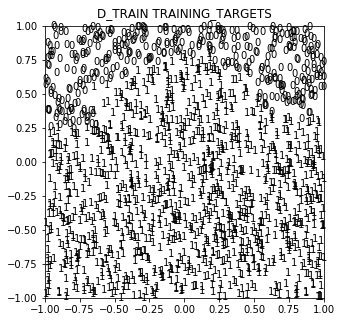

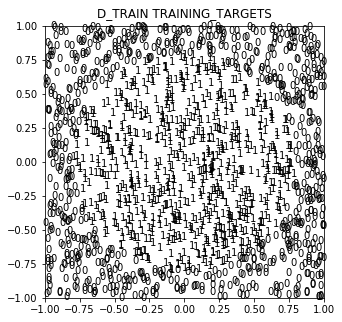

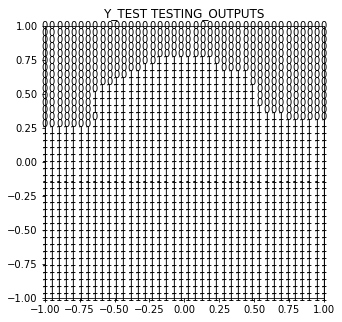

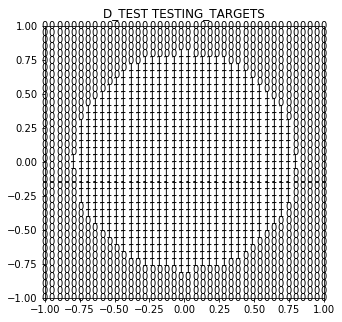

In [0]:
print("\n\nE_TestSet: \n\n", E)

#printSquarePLT( Y_train, "Y_TRAIN TRAINING_OUTPUTS", None )
#printSquarePLT( D_train, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'

#printSquarePLT_NEW( Y_train, X_train, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'
#printSquarePLT_NEW( D_train, X_train, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'

#printSquarePLT_NEW(  Y_test,  X_test, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'
#printSquarePLT_NEW(  D_test,  X_test, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'

#printSquarePLT(  Y_test, "Y_TEST TESTING_OUTPUTS" )
#printSquarePLT(  D_test, "D_TEST TESTING_TARGETS" )

printSquarePLT2( Y_train, X_train, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'
printSquarePLT2( D_train, X_train, "D_TRAIN TRAINING_TARGETS", None ) # 'binary'
printSquarePLT2(  Y_test,X_test, "Y_TEST TESTING_OUTPUTS" )
printSquarePLT2(  D_test, X_test,"D_TEST TESTING_TARGETS" )

# PLOT DATA

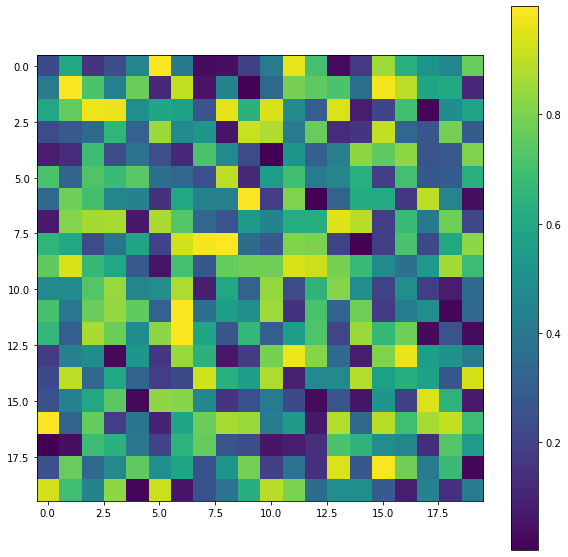

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

plt.imshow(np.random.random((20,20)));
plt.colorbar()
plt.show()



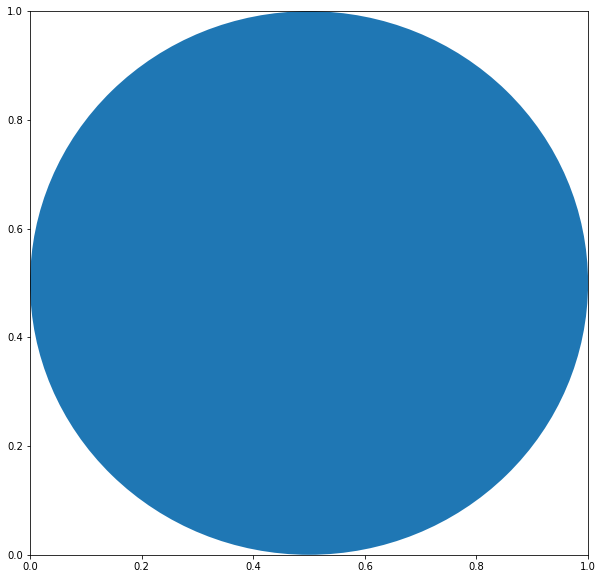

In [0]:
fig = plt.figure( figsize = (10,10), facecolor='white')#, dpi = 50)
circle = plt.Circle((0.5,0.5),0.5,fill=True)#False)
plt.gcf().gca().add_artist(circle)
plt.show()

In [0]:
rand_arr = np.random.randint(2,size=16*16)
rand_arr = np.reshape( rand_arr, ( 16, 16 ) )
print( rand_arr )

[[0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1]
 [0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0]
 [1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0]
 [1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0]
 [1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0]
 [1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0]
 [1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0]
 [0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0]
 [1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1]
 [1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1]
 [1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0]
 [0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0]
 [1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1]]
